## Aryo Adi Putro - 2341720084
## TI-3G

### K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from sklearn.metrics import v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Display informasi dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

In [3]:
# Pilih fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

print("Selected Features Shape:", X.shape)
print("\nFirst 5 samples:")
print(X[:5])

Selected Features Shape: (200, 2)

First 5 samples:
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


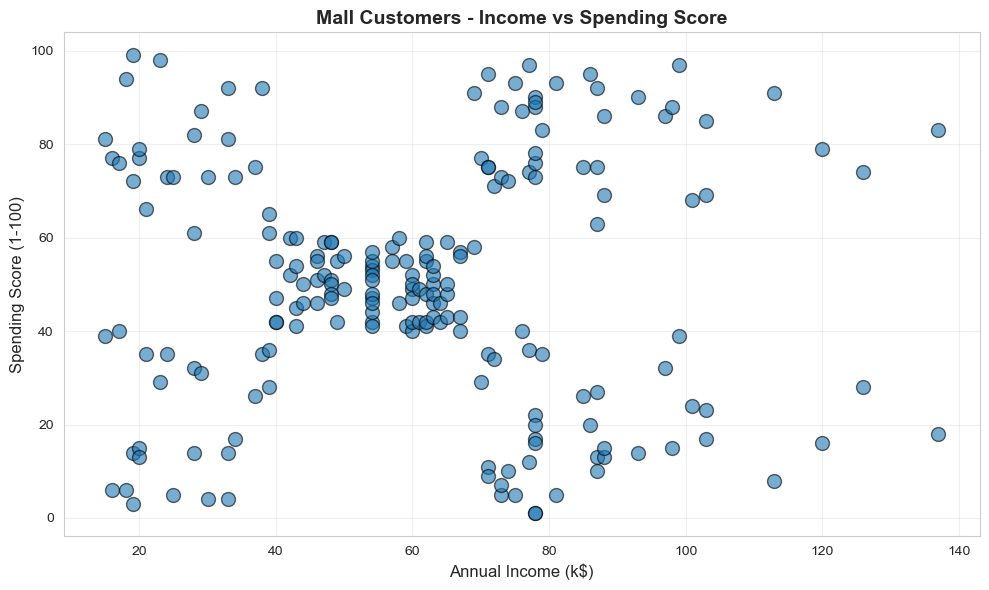

In [4]:
# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=100, edgecolors='k')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Mall Customers - Income vs Spending Score', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

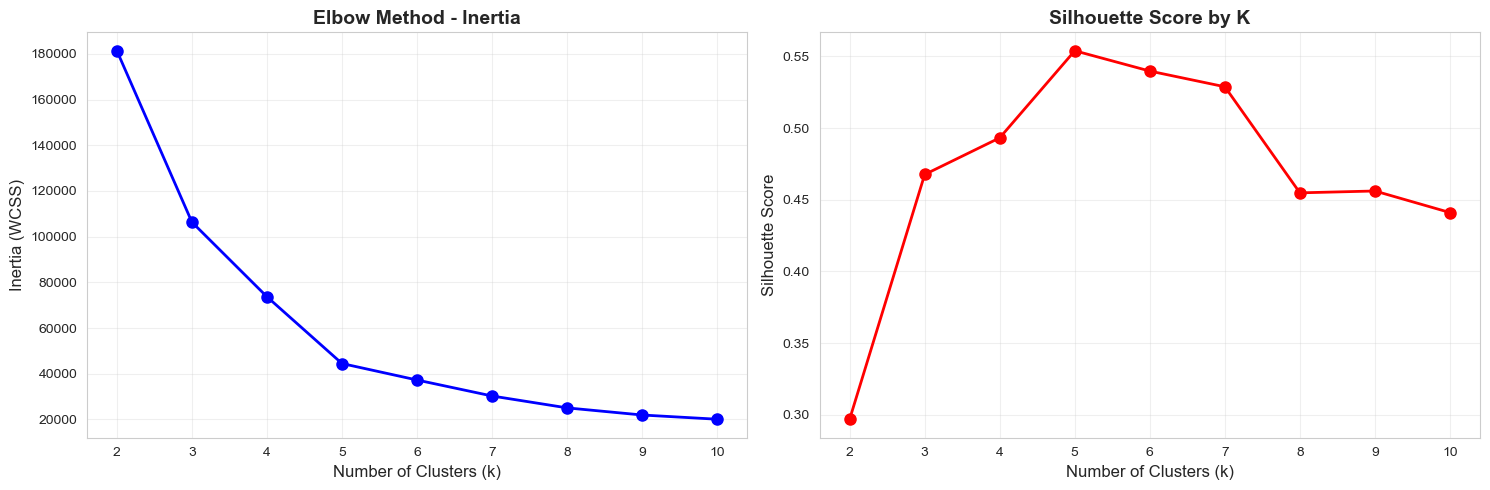

K	Inertia		Silhouette Score
---------------------------------------------
2	181363.60		0.2969
3	106348.37		0.4676
4	73679.79		0.4932
5	44448.46		0.5539
6	37233.81		0.5398
7	30241.34		0.5288
8	25036.42		0.4548
9	21916.79		0.4561
10	20072.07		0.4411


In [5]:
# Elbow Method untuk menentukan k terbaik
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Inertia plot
ax1.plot(k_range, inertia, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia (WCSS)', fontsize=12)
ax1.set_title('Elbow Method - Inertia', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Silhouette Score plot
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score by K', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print scores
print("K\tInertia\t\tSilhouette Score")
print("-" * 45)
for k, iner, sil in zip(k_range, inertia, silhouette_scores):
    print(f"{k}\t{iner:.2f}\t\t{sil:.4f}")

In [6]:
# Berdasarkan Elbow Method, k=5 terlihat optimal
optimal_k = 5

# Buat model K-Means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Hasil clustering
print(f"Optimal K: {optimal_k}")
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(X, y_kmeans):.4f}")
print(f"\nCluster Centers:")
print(kmeans.cluster_centers_)
print(f"\nCluster Distribution:")
unique, counts = np.unique(y_kmeans, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} customers")

Optimal K: 5
Inertia: 44448.46
Silhouette Score: 0.5539

Cluster Centers:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]

Cluster Distribution:
Cluster 0: 81 customers
Cluster 1: 39 customers
Cluster 2: 22 customers
Cluster 3: 35 customers
Cluster 4: 23 customers


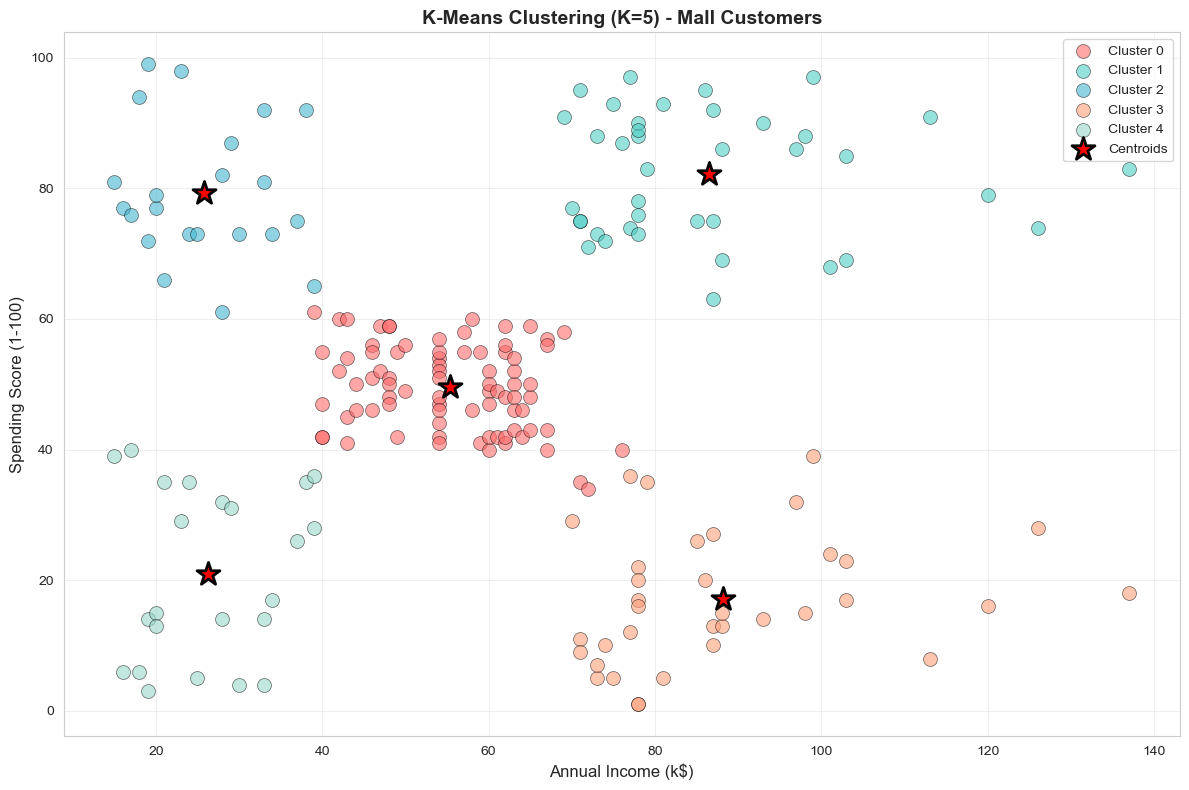

In [7]:
# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))

# Plot setiap cluster dengan warna berbeda
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
for i in range(optimal_k):
    cluster_points = X[y_kmeans == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                s=100, c=colors[i], label=f'Cluster {i}', 
                alpha=0.6, edgecolors='k', linewidth=0.5)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='*', edgecolors='black', linewidth=2,
            label='Centroids', zorder=5)

plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title(f'K-Means Clustering (K={optimal_k}) - Mall Customers', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
# Generate make_moons dataset
X_moons, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

print("Dataset Shape:", X_moons.shape)
print("True Labels:", np.unique(y_true))

# Normalisasi data
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)

print("\nBefore Normalization:")
print(f"Mean: {X_moons.mean(axis=0)}")
print(f"Std: {X_moons.std(axis=0)}")

print("\nAfter Normalization:")
print(f"Mean: {X_moons_scaled.mean(axis=0)}")
print(f"Std: {X_moons_scaled.std(axis=0)}")

Dataset Shape: (1000, 2)
True Labels: [0 1]

Before Normalization:
Mean: [0.49925327 0.2486601 ]
Std: [0.86775501 0.49603008]

After Normalization:
Mean: [-2.53075338e-16 -3.20854454e-16]
Std: [1. 1.]


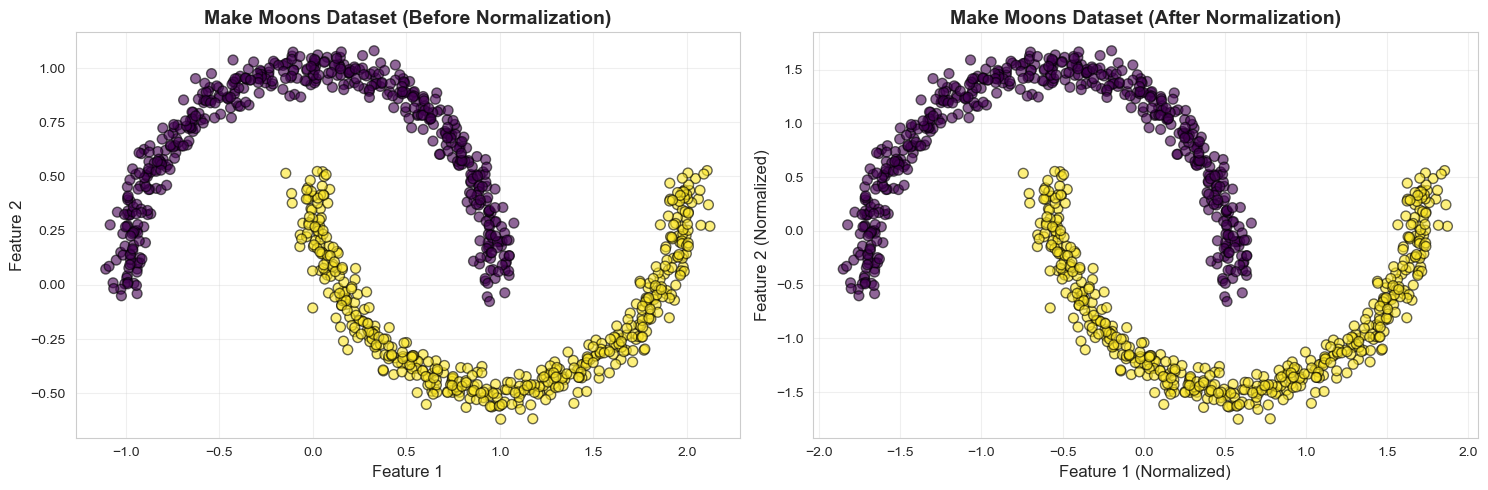

In [9]:
# Visualisasi dataset make_moons
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Before normalization
ax1.scatter(X_moons[:, 0], X_moons[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
ax1.set_xlabel('Feature 1', fontsize=12)
ax1.set_ylabel('Feature 2', fontsize=12)
ax1.set_title('Make Moons Dataset (Before Normalization)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# After normalization
ax2.scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
ax2.set_xlabel('Feature 1 (Normalized)', fontsize=12)
ax2.set_ylabel('Feature 2 (Normalized)', fontsize=12)
ax2.set_title('Make Moons Dataset (After Normalization)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# Jalankan DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons_scaled)

# Hitung jumlah cluster dan noise
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)

print(f"eps: 0.2, min_samples: 5")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Cluster labels: {set(y_dbscan)}")

# Cluster distribution
unique, counts = np.unique(y_dbscan, return_counts=True)
print(f"\nCluster Distribution:")
for label, count in zip(unique, counts):
    if label == -1:
        print(f"Noise: {count} points")
    else:
        print(f"Cluster {label}: {count} points")

eps: 0.2, min_samples: 5
Number of clusters: 2
Number of noise points: 0
Cluster labels: {np.int64(0), np.int64(1)}

Cluster Distribution:
Cluster 0: 500 points
Cluster 1: 500 points


In [11]:
# Evaluasi clustering
homogeneity = homogeneity_score(y_true, y_dbscan)
completeness = completeness_score(y_true, y_dbscan)
v_measure = v_measure_score(y_true, y_dbscan)
ari = adjusted_rand_score(y_true, y_dbscan)
ami = adjusted_mutual_info_score(y_true, y_dbscan)

# Silhouette score (exclude noise points)
mask = y_dbscan != -1
if len(set(y_dbscan[mask])) > 1:
    silhouette = silhouette_score(X_moons_scaled[mask], y_dbscan[mask])
else:
    silhouette = 0.0

print("="*50)
print("EVALUATION METRICS")
print("="*50)
print(f"Homogeneity Score:     {homogeneity:.4f}")
print(f"Completeness Score:    {completeness:.4f}")
print(f"V-Measure Score:       {v_measure:.4f}")
print(f"Adjusted Rand Index:   {ari:.4f}")
print(f"Adjusted Mutual Info:  {ami:.4f}")
print(f"Silhouette Score:      {silhouette:.4f}")
print("="*50)

EVALUATION METRICS
Homogeneity Score:     1.0000
Completeness Score:    1.0000
V-Measure Score:       1.0000
Adjusted Rand Index:   1.0000
Adjusted Mutual Info:  1.0000
Silhouette Score:      0.3912


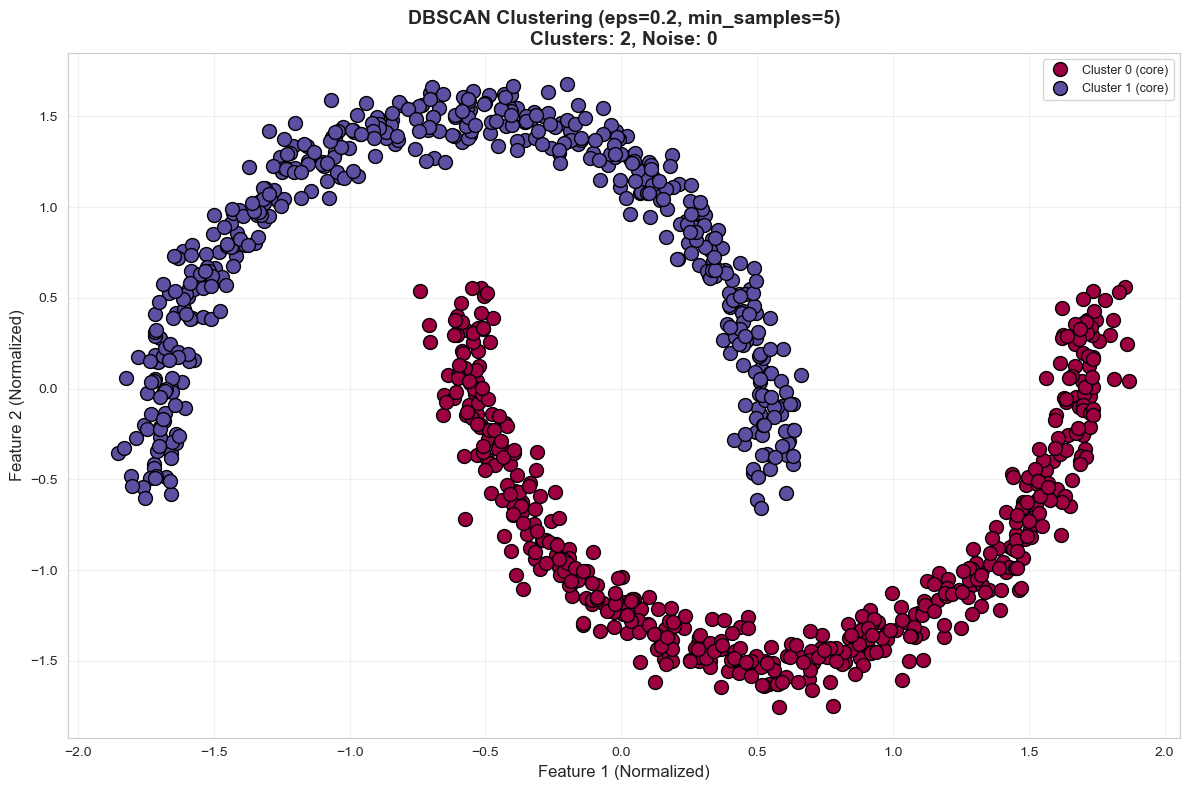

In [12]:
# Visualisasi DBSCAN dengan core samples
core_samples_mask = np.zeros_like(y_dbscan, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Unique labels
unique_labels = set(y_dbscan)
colors_dbscan = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(12, 8))

for k, col in zip(unique_labels, colors_dbscan):
    if k == -1:
        # Noise: black color
        col = [0, 0, 0, 1]
    
    class_member_mask = (y_dbscan == k)
    
    # Core samples: large points
    xy = X_moons_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10, label=f'Cluster {k} (core)' if k != -1 else 'Noise')
    
    # Non-core samples: small points
    xy = X_moons_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.xlabel('Feature 1 (Normalized)', fontsize=12)
plt.ylabel('Feature 2 (Normalized)', fontsize=12)
plt.title(f'DBSCAN Clustering (eps=0.2, min_samples=5)\nClusters: {n_clusters}, Noise: {n_noise}', 
          fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
# Eksperimen dengan berbagai parameter
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 5, 10, 20]

# Store results
results = []

print("="*100)
print(f"{'eps':<8} {'min_samples':<15} {'Clusters':<10} {'Noise':<10} {'Homog.':<10} {'Compl.':<10} {'V-Meas.':<10} {'ARI':<10} {'AMI':<10} {'Silh.':<10}")
print("="*100)

for eps in eps_values:
    for min_samples in min_samples_values:
        # Run DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_moons_scaled)
        
        # Calculate metrics
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        
        homog = homogeneity_score(y_true, labels)
        compl = completeness_score(y_true, labels)
        v_meas = v_measure_score(y_true, labels)
        ari_ = adjusted_rand_score(y_true, labels)
        ami_ = adjusted_mutual_info_score(y_true, labels)
        
        # Silhouette (exclude noise)
        mask_ = labels != -1
        if len(set(labels[mask_])) > 1:
            silh = silhouette_score(X_moons_scaled[mask_], labels[mask_])
        else:
            silh = 0.0
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters_,
            'n_noise': n_noise_,
            'homogeneity': homog,
            'completeness': compl,
            'v_measure': v_meas,
            'ari': ari_,
            'ami': ami_,
            'silhouette': silh
        })
        
        print(f"{eps:<8.2f} {min_samples:<15} {n_clusters_:<10} {n_noise_:<10} {homog:<10.4f} {compl:<10.4f} {v_meas:<10.4f} {ari_:<10.4f} {ami_:<10.4f} {silh:<10.4f}")

print("="*100)

eps      min_samples     Clusters   Noise      Homog.     Compl.     V-Meas.    ARI        AMI        Silh.     
0.05     3               69         186        0.8156     0.1525     0.2570     0.0300     0.2438     0.3492    
0.05     5               61         386        0.6155     0.1369     0.2240     0.0156     0.2103     0.5017    
0.05     10              3          970        0.0307     0.1268     0.0494     0.0023     0.0459     0.8807    
0.05     20              0          1000       0.0000     1.0000     0.0000     0.0000     0.0000     0.0000    
0.10     3               2          14         0.9862     0.9029     0.9427     0.9722     0.9426     0.3939    
0.10     5               3          19         0.9813     0.6328     0.7694     0.7584     0.7690     0.3778    
0.10     10              7          57         0.9433     0.4095     0.5711     0.5234     0.5698     0.2097    
0.10     20              6          850        0.1539     0.1555     0.1547     0.0168     0.150

In [14]:
# Convert results to DataFrame for better analysis
results_df = pd.DataFrame(results)
print("\nResults Summary:")
print(results_df.to_string(index=False))


Results Summary:
 eps  min_samples  n_clusters  n_noise  homogeneity  completeness  v_measure      ari      ami  silhouette
0.05            3          69      186     0.815554      0.152548   0.257021 0.030044 0.243805    0.349166
0.05            5          61      386     0.615466      0.136931   0.224021 0.015642 0.210259    0.501707
0.05           10           3      970     0.030669      0.126764   0.049389 0.002283 0.045864    0.880676
0.05           20           0     1000     0.000000      1.000000   0.000000 0.000000 0.000000    0.000000
0.10            3           2       14     0.986207      0.902896   0.942714 0.972179 0.942634    0.393924
0.10            5           3       19     0.981343      0.632772   0.769420 0.758440 0.769024    0.377767
0.10           10           7       57     0.943317      0.409546   0.571132 0.523399 0.569801    0.209685
0.10           20           6      850     0.153928      0.155466   0.154693 0.016754 0.150916    0.787331
0.20            3  

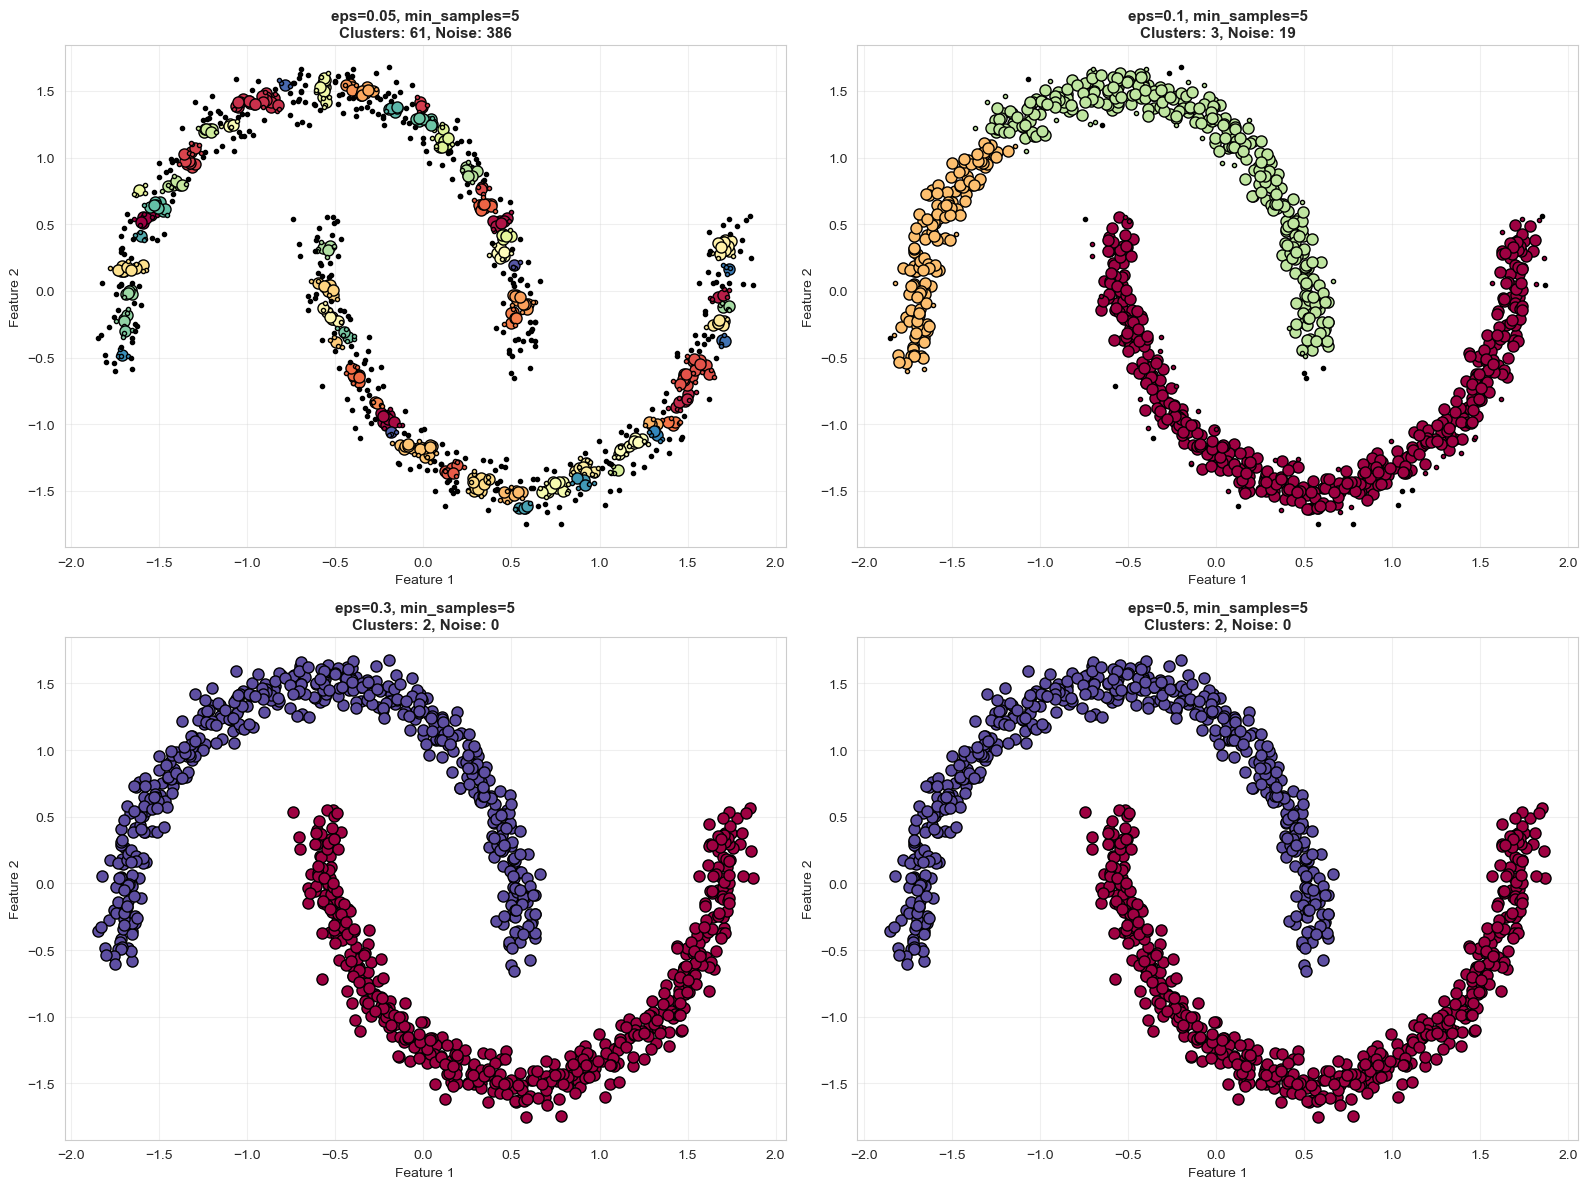

In [15]:
# Visualisasi hasil DBSCAN untuk berbagai nilai eps (dengan min_samples=5)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

eps_test = [0.05, 0.1, 0.3, 0.5]
min_samp_test = 5

for idx, eps_val in enumerate(eps_test):
    db = DBSCAN(eps=eps_val, min_samples=min_samp_test)
    labels = db.fit_predict(X_moons_scaled)
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    core_mask = np.zeros_like(labels, dtype=bool)
    core_mask[db.core_sample_indices_] = True
    
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        
        class_mask = (labels == k)
        
        # Core samples
        xy = X_moons_scaled[class_mask & core_mask]
        axes[idx].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                      markeredgecolor='k', markersize=8)
        
        # Non-core samples
        xy = X_moons_scaled[class_mask & ~core_mask]
        axes[idx].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                      markeredgecolor='k', markersize=3)
    
    axes[idx].set_xlabel('Feature 1', fontsize=10)
    axes[idx].set_ylabel('Feature 2', fontsize=10)
    axes[idx].set_title(f'eps={eps_val}, min_samples={min_samp_test}\nClusters: {n_clusters_}, Noise: {n_noise_}', 
                        fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

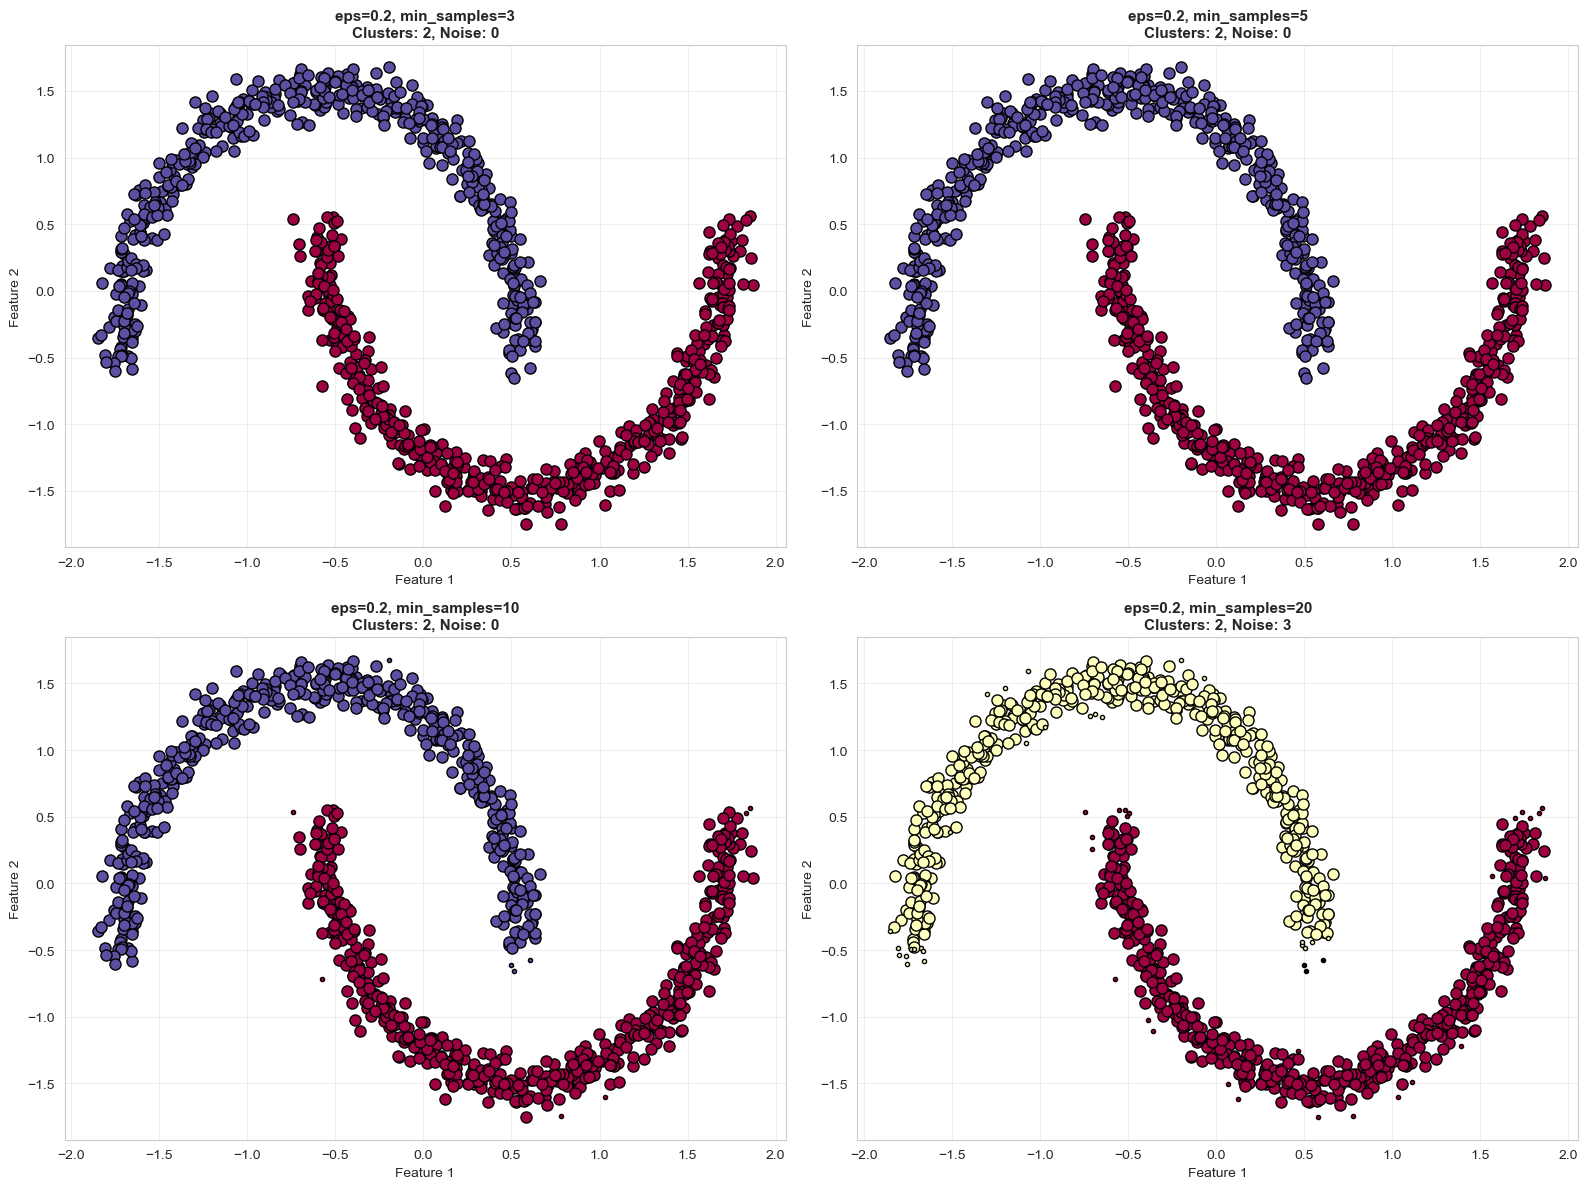

In [16]:
# Visualisasi hasil DBSCAN untuk berbagai nilai min_samples (dengan eps=0.2)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

eps_test_val = 0.2
min_samples_test = [3, 5, 10, 20]

for idx, min_s in enumerate(min_samples_test):
    db = DBSCAN(eps=eps_test_val, min_samples=min_s)
    labels = db.fit_predict(X_moons_scaled)
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    core_mask = np.zeros_like(labels, dtype=bool)
    core_mask[db.core_sample_indices_] = True
    
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        
        class_mask = (labels == k)
        
        # Core samples
        xy = X_moons_scaled[class_mask & core_mask]
        axes[idx].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                      markeredgecolor='k', markersize=8)
        
        # Non-core samples
        xy = X_moons_scaled[class_mask & ~core_mask]
        axes[idx].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                      markeredgecolor='k', markersize=3)
    
    axes[idx].set_xlabel('Feature 1', fontsize=10)
    axes[idx].set_ylabel('Feature 2', fontsize=10)
    axes[idx].set_title(f'eps={eps_test_val}, min_samples={min_s}\nClusters: {n_clusters_}, Noise: {n_noise_}', 
                        fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

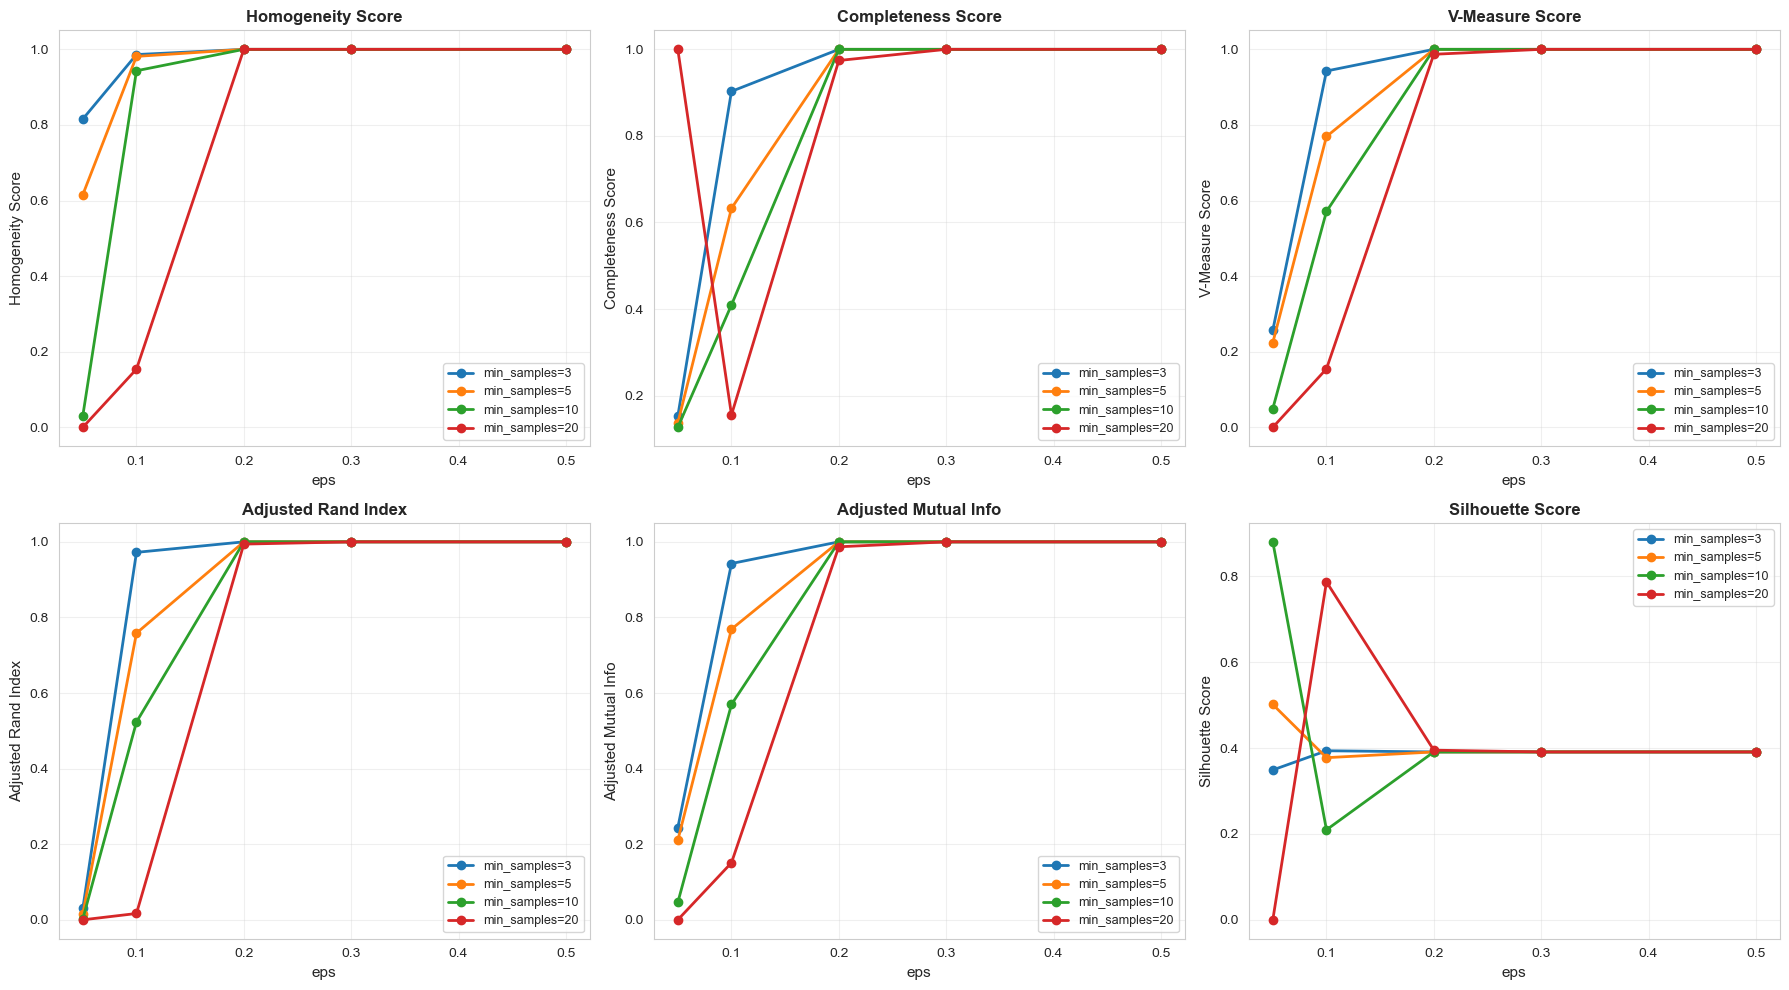

In [17]:
# Plot metrik evaluasi terhadap parameter
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = ['homogeneity', 'completeness', 'v_measure', 'ari', 'ami', 'silhouette']
titles = ['Homogeneity Score', 'Completeness Score', 'V-Measure Score', 
          'Adjusted Rand Index', 'Adjusted Mutual Info', 'Silhouette Score']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 3, idx % 3]
    
    # Plot untuk setiap min_samples
    for min_s in min_samples_values:
        data = results_df[results_df['min_samples'] == min_s]
        ax.plot(data['eps'], data[metric], marker='o', label=f'min_samples={min_s}', linewidth=2)
    
    ax.set_xlabel('eps', fontsize=11)
    ax.set_ylabel(title, fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

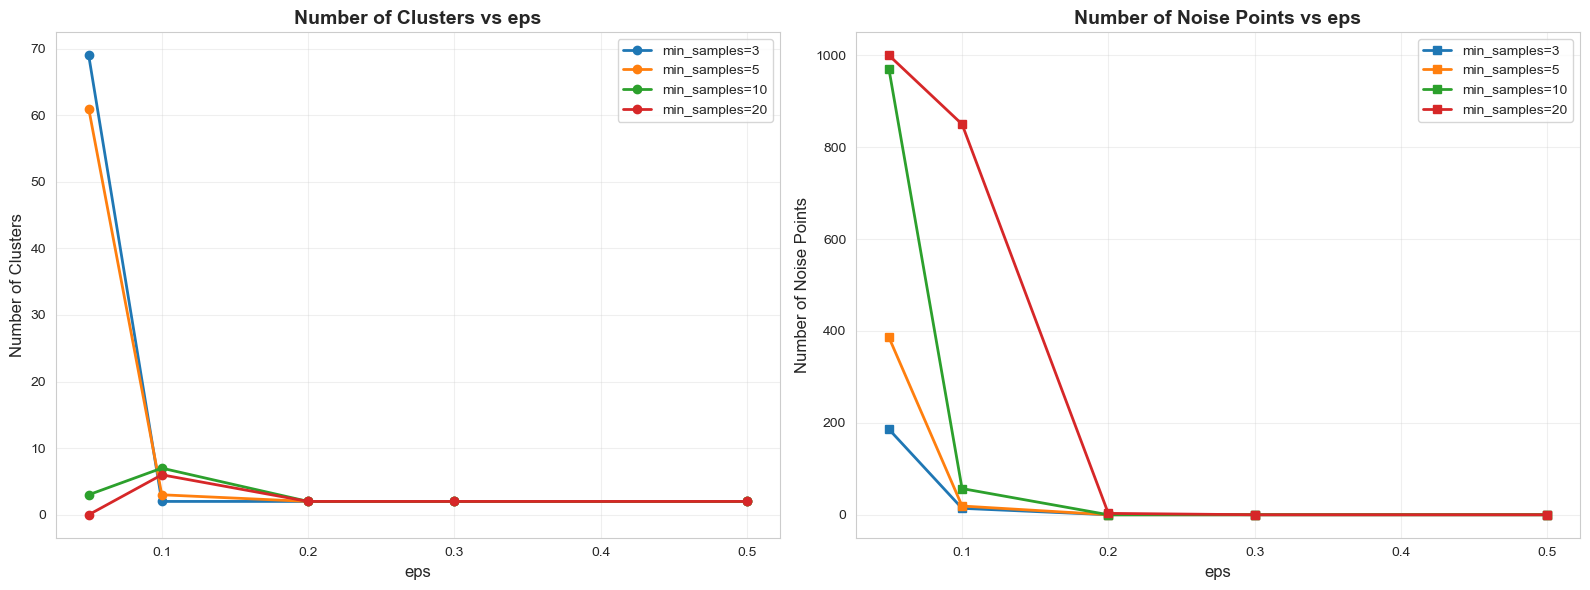

In [18]:
# Plot jumlah cluster dan noise
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot jumlah clusters
for min_s in min_samples_values:
    data = results_df[results_df['min_samples'] == min_s]
    ax1.plot(data['eps'], data['n_clusters'], marker='o', label=f'min_samples={min_s}', linewidth=2)

ax1.set_xlabel('eps', fontsize=12)
ax1.set_ylabel('Number of Clusters', fontsize=12)
ax1.set_title('Number of Clusters vs eps', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot jumlah noise
for min_s in min_samples_values:
    data = results_df[results_df['min_samples'] == min_s]
    ax2.plot(data['eps'], data['n_noise'], marker='s', label=f'min_samples={min_s}', linewidth=2)

ax2.set_xlabel('eps', fontsize=12)
ax2.set_ylabel('Number of Noise Points', fontsize=12)
ax2.set_title('Number of Noise Points vs eps', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()